## Phase Diversity with smoothing for whole plane
Previously, in this [notebook](https://nbviewer.jupyter.org/github/Mipanox/GPI_stuff/blob/master/notebooks/PR_PD-smoothing.ipynb), the smoothing was done only outside the support, thus couldn't remove the high-frequency components in the aperture. Here we explore the contrary situation: everything is equally filtered

### Improvements:
* Re-defined `defocus` to be the rms of the effective aberration in unit of wavelength
* Initial guess changed to in pupil plane for both amplitude and phase (previously phase in focal plane and then transform back to get initial estimate for pupil plane phasor)
* The phase guess is random in Zernike modes to optimize for most probable inputs from real applications
* Last filtering have $\sigma\sim$ one quarter of apeture diameter, instead of the previous less aggressive one

In [1]:
%%capture
%load_ext autoreload
%autoreload 2+

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
exec(open('../codes/zernike.py'))
exec(open('../codes/pr.py'))
exec(open('../codes/util.py'))
%matplotlib inline

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

---
## 100% Aberrations in Phase
> Note: GPI can normally achive defocusing on the order of 1/10 of a full wave.

In [3]:
coeff1 = [0]*35
coeff2 = [0,0,0.4,1,0,0,3,0,0.9,1,0,1.5,0,0.4,0]+[0]*20
defocus = 0.1

[P11,P_11,F11,F_11], \
[D11,D_11,Fd11,F_d11] = true_imgs_defocus(Npix=128,oversamp=2,
                                          coeff1=coeff1,
                                          coeff2=coeff2,
                                          defocus=defocus,
                                          max_aberP=0.5)

test11 = PR(pup=P11,foc=F11,oversamp=2)
test11(foc_defoc=[F11,Fd11])

#### Inputs

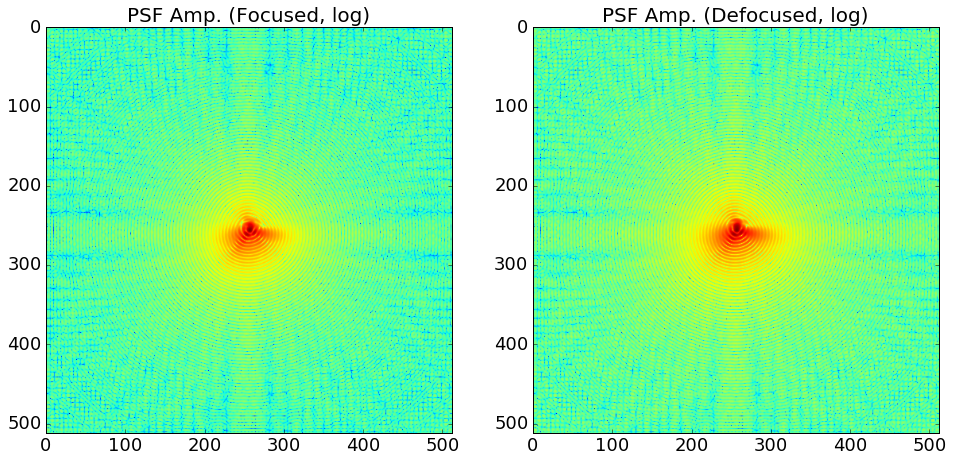

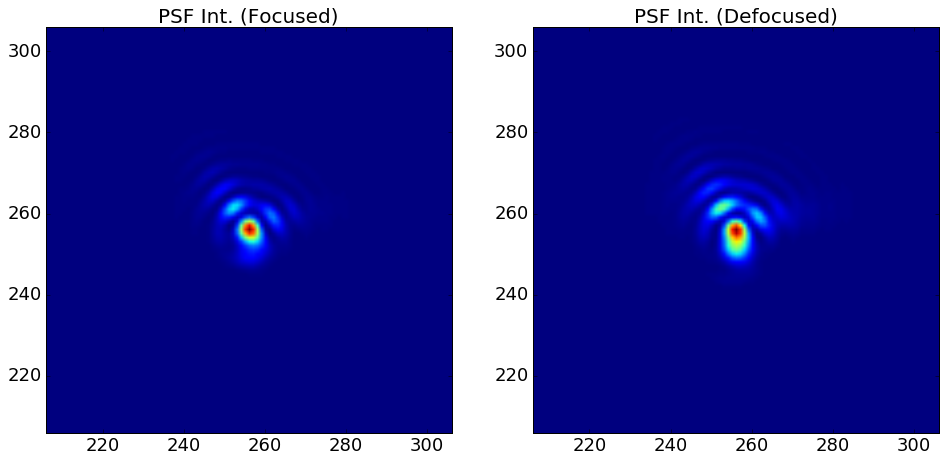

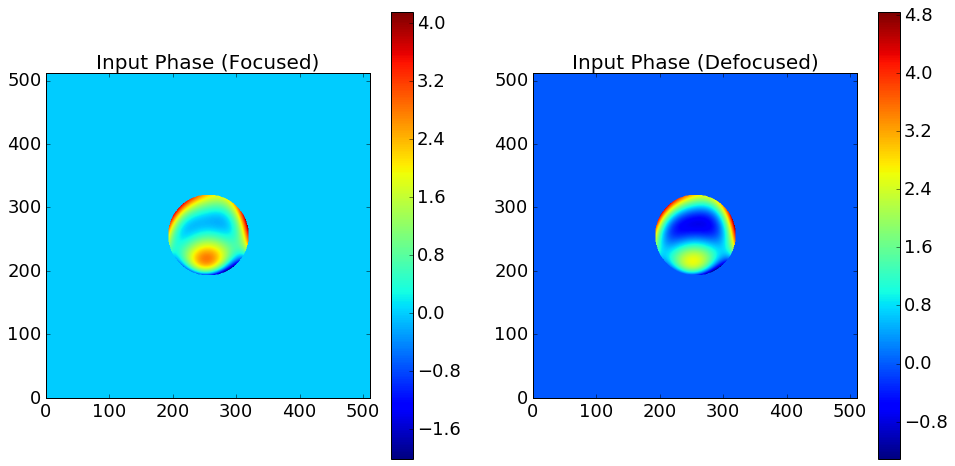

In [58]:
plt.figure(figsize=(16,8))
plt.subplot(121); plt.imshow(np.sqrt(test11.foc_foc),norm=LogNorm()); plt.title('PSF Amp. (Focused, log)')
plt.subplot(122); plt.imshow(np.sqrt(test11.foc_def),norm=LogNorm()); plt.title('PSF Amp. (Defocused, log)')

plt.figure(figsize=(16,8))
plt.subplot(121); plt.imshow(test11.foc_foc); plt.title('PSF Int. (Focused)'); plt.xlim(206,306); plt.ylim(206,306)
plt.subplot(122); plt.imshow(test11.foc_def); plt.title('PSF Int. (Defocused)'); plt.xlim(206,306); plt.ylim(206,306)

plt.figure(figsize=(16,8))
plt.subplot(121); plt.imshow(unwrap_phase(np.angle(P_11)),origin='lower'); 
plt.colorbar(); plt.title('Input Phase (Focused)')
plt.subplot(122); plt.imshow(unwrap_phase(np.angle(D_11)),origin='lower'); 
plt.colorbar(); plt.title('Input Phase (Defocused)')

Almost indiscernable in amplitude (intensity), but conspicuous in phase.

### Run

Caution: Pupil image is not used for constraints.
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Gradual filtering done in the whole plane


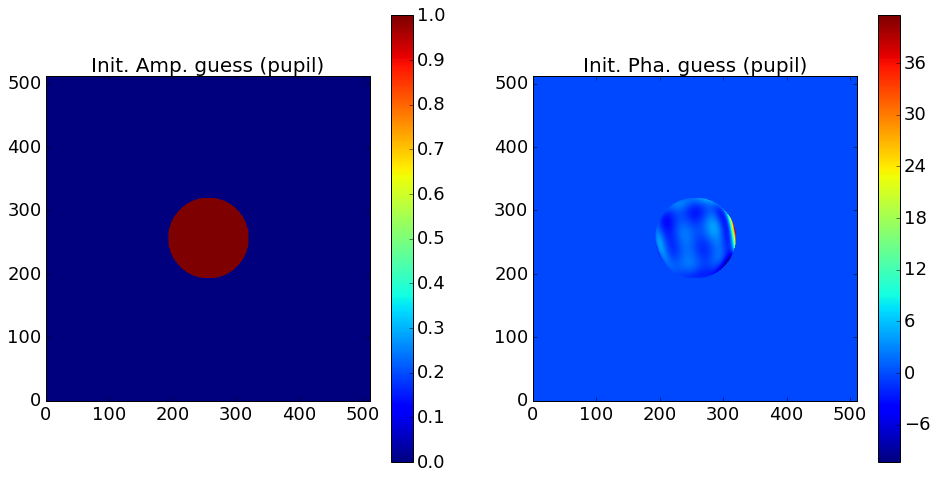

Current filter:


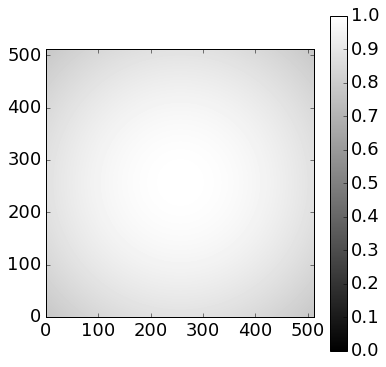

Current step                    : 0
Error (of focused Fourier plane): 9.29e-03
Current step                    : 100
Error (of focused Fourier plane): 2.61e-03
Current filter:


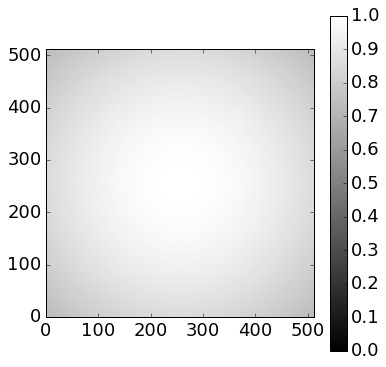

Current step                    : 200
Error (of focused Fourier plane): 2.51e-03
Current step                    : 300
Error (of focused Fourier plane): 2.67e-03
Current filter:


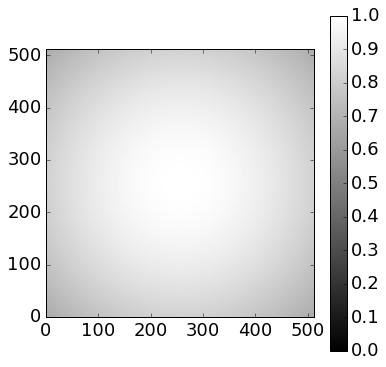

Current step                    : 400
Error (of focused Fourier plane): 2.50e-03
Current step                    : 500
Error (of focused Fourier plane): 2.66e-03
Current filter:


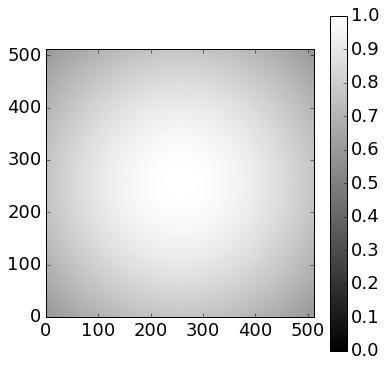

Current step                    : 600
Error (of focused Fourier plane): 2.51e-03
Current step                    : 700
Error (of focused Fourier plane): 2.69e-03
Current filter:


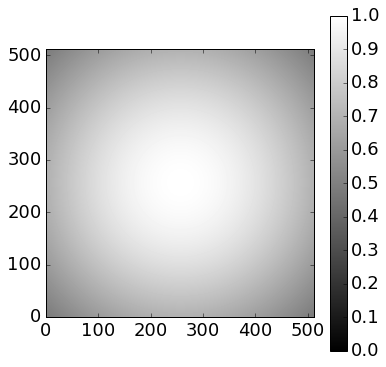

Current step                    : 800
Error (of focused Fourier plane): 2.51e-03
Current step                    : 900
Error (of focused Fourier plane): 2.64e-03
Current filter:


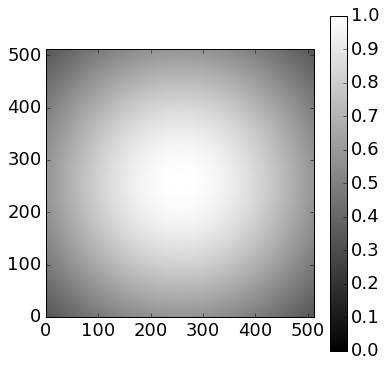

Current step                    : 1000
Error (of focused Fourier plane): 2.51e-03
Current step                    : 1100
Error (of focused Fourier plane): 2.66e-03
Current filter:


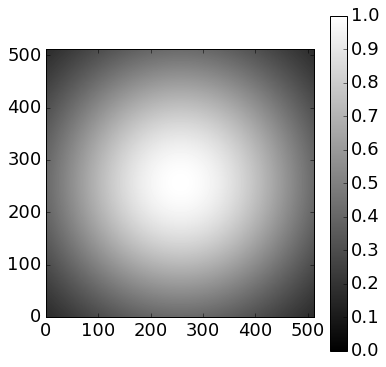

Current step                    : 1200
Error (of focused Fourier plane): 2.52e-03
Current step                    : 1300
Error (of focused Fourier plane): 2.63e-03
Current filter:


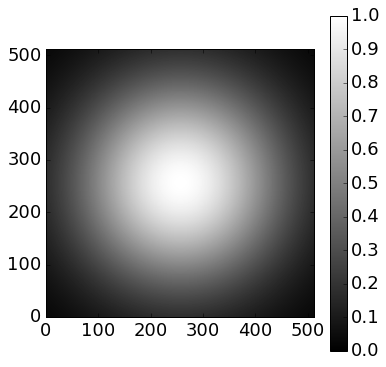

Current step                    : 1400
Error (of focused Fourier plane): 2.51e-03
Current step                    : 1500
Error (of focused Fourier plane): 2.56e-03
Current filter:


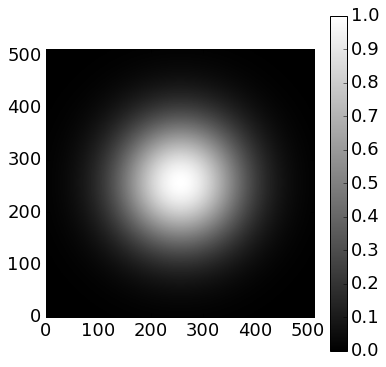

Current step                    : 1600
Error (of focused Fourier plane): 2.52e-03
Current step                    : 1700
Error (of focused Fourier plane): 2.51e-03
Current filter:


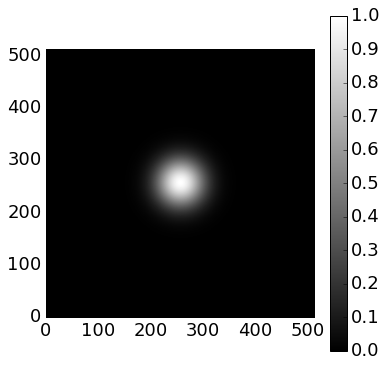

Current step                    : 1800
Error (of focused Fourier plane): 2.45e-03
Current step                    : 1900
Error (of focused Fourier plane): 2.55e-03
-----------------------
First iteration error: 9.29e-03
Final step : 2000
Final Error: 2.51e-03


In [59]:
PD_ER_pup11, \
PD_ER_foc11, \
PD_ER_errlist11, \
PD_ER_pup11_proj,\
PD_ER_errpuplist11 = test11.PD_ER_smoothing(defocus=defocus,init='random',
                                            force_only_phase=True,smoo_in=True)

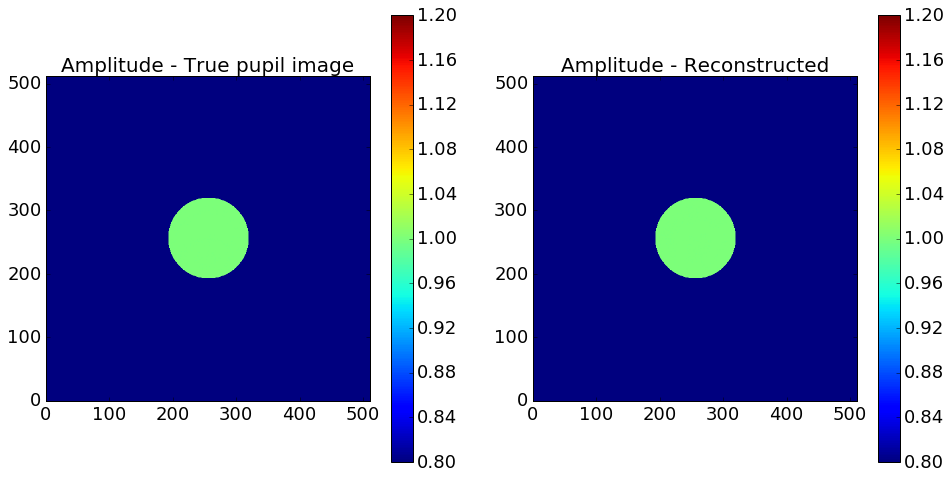

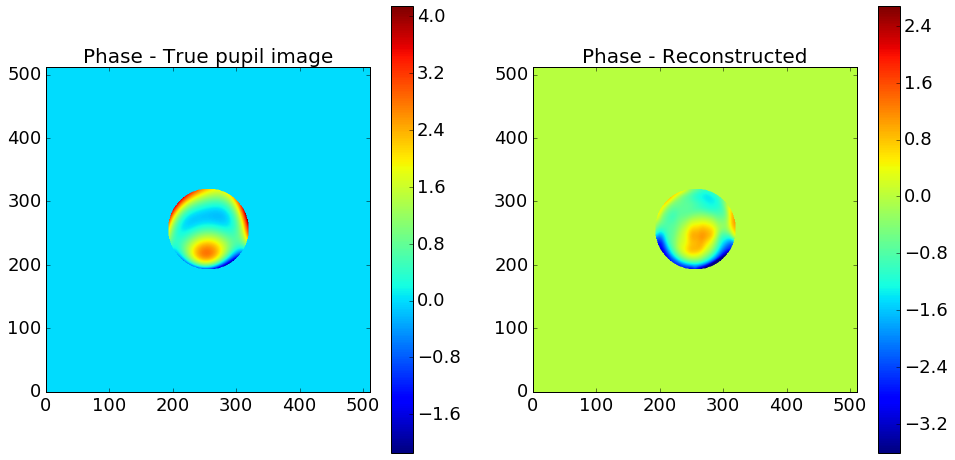

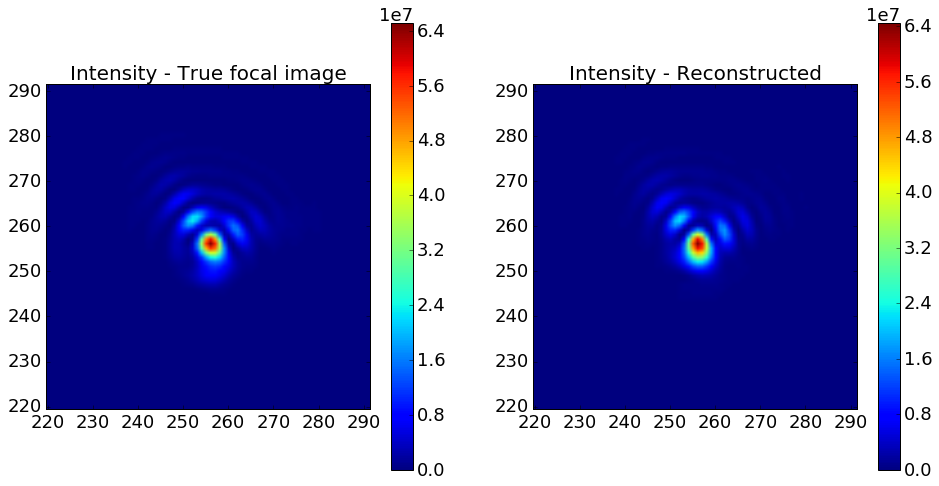

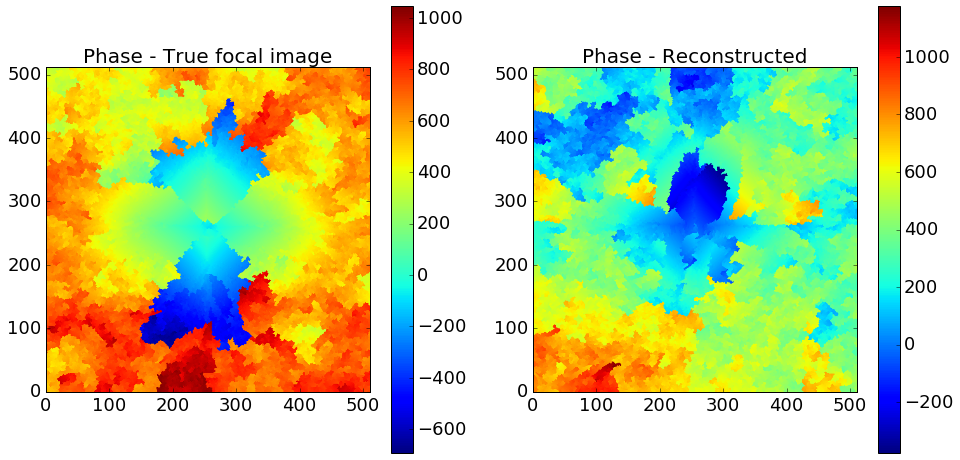

In [60]:
plot_recon(P_11,F_11,PD_ER_pup11_proj,PD_ER_foc11,recons_clim=True,max_abrPha=0.5)

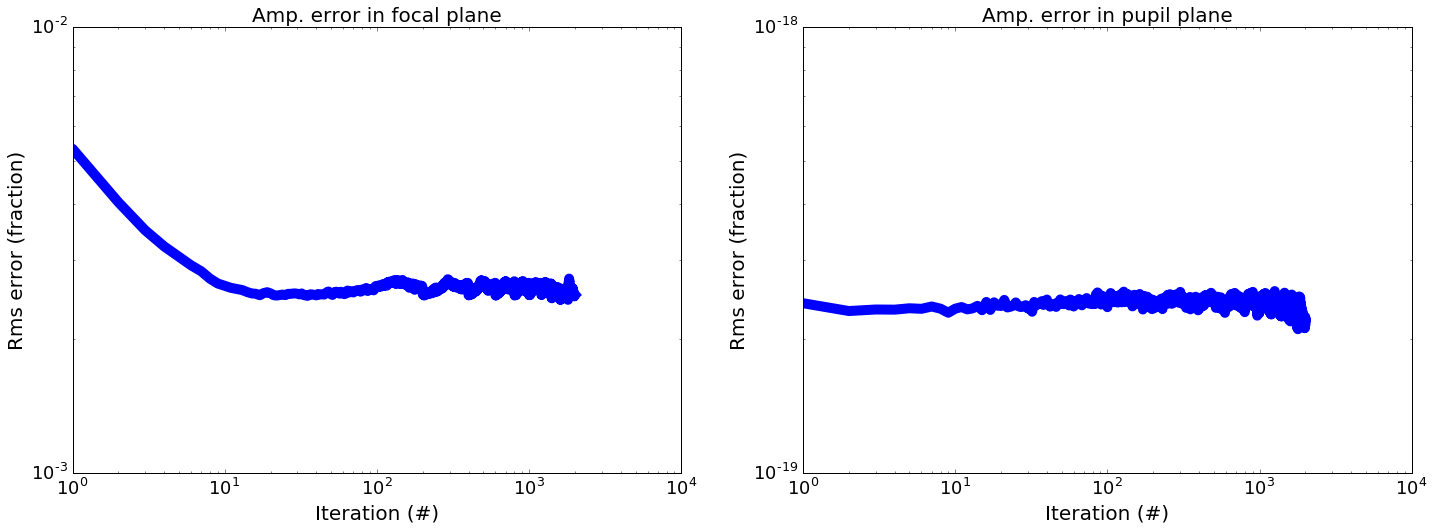

In [61]:
plot_errlist(PD_ER_errlist11,PD_ER_errpuplist11)

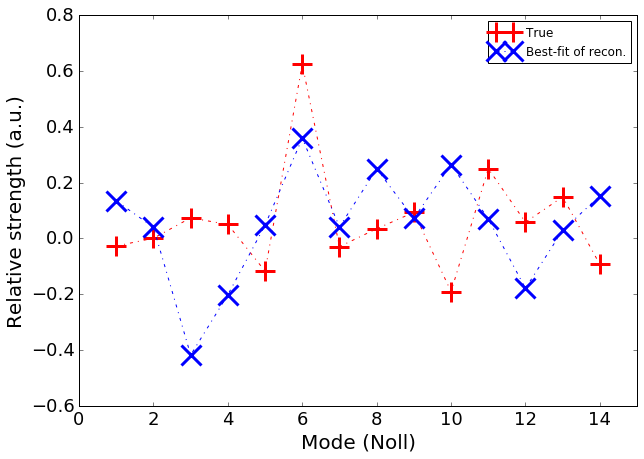

In [83]:
coef_11_true, \
coef_11_reco = wrap_up_zern_fit(test11,
                                Recon_phasor=PD_ER_pup11_proj,
                                P_phasor=P_11,
                                oversamp=2)

Though our eyes would pick up the important features, the computer disagrees...

### Pattern 2

In [62]:
coeff1 = [0]*35
coeff2 = [0,1,0,0,0,1,2,0,2,1.5,2,0,0,0,0]+[0]*20
defocus = 0.1

In [63]:
[P10,P_10,F10,F_10], \
[D10,D_10,Fd10,F_d10] = true_imgs_defocus(Npix=128,oversamp=2,
                                          coeff1=coeff1,
                                          coeff2=coeff2,
                                          defocus=defocus,
                                          max_aberP=.5)

test10 = PR(pup=P10,foc=F10,oversamp=2)
test10(foc_defoc=[F10,Fd10])

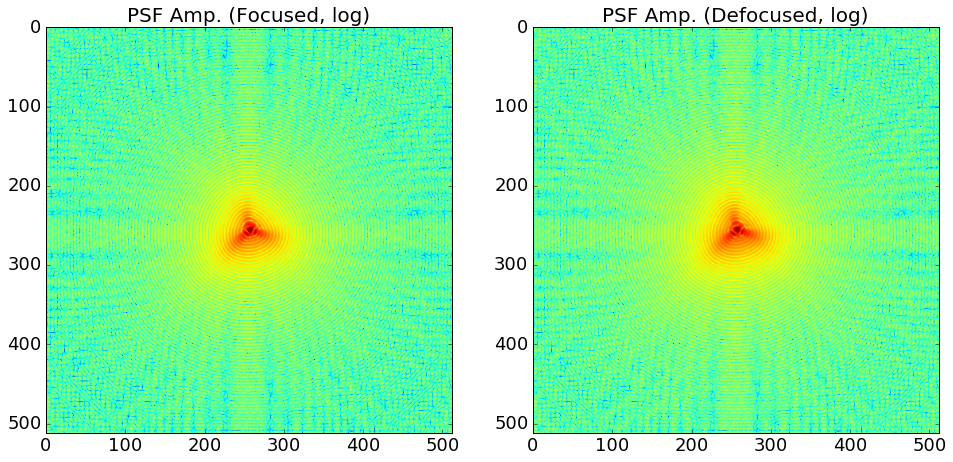

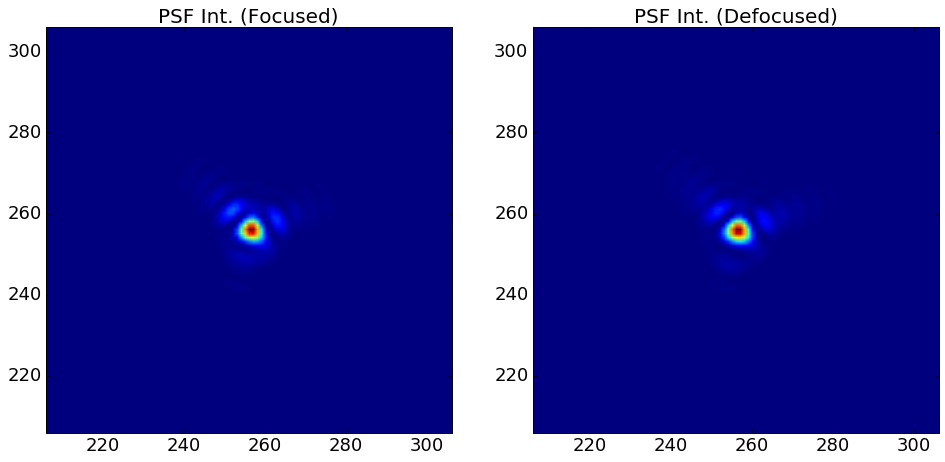

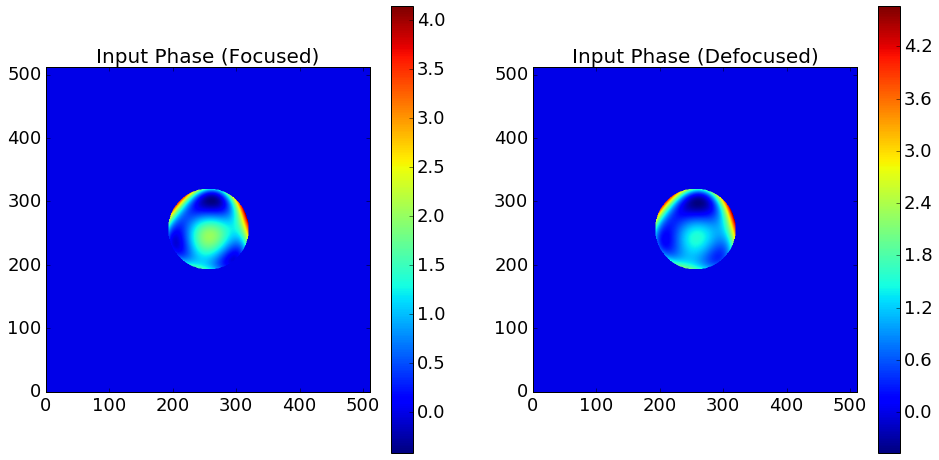

In [64]:
plt.figure(figsize=(16,8))
plt.subplot(121); plt.imshow(np.sqrt(test10.foc_foc),norm=LogNorm()); plt.title('PSF Amp. (Focused, log)')
plt.subplot(122); plt.imshow(np.sqrt(test10.foc_def),norm=LogNorm()); plt.title('PSF Amp. (Defocused, log)')

plt.figure(figsize=(16,8))
plt.subplot(121); plt.imshow(test10.foc_foc); plt.title('PSF Int. (Focused)'); plt.xlim(206,306); plt.ylim(206,306)
plt.subplot(122); plt.imshow(test10.foc_def); plt.title('PSF Int. (Defocused)'); plt.xlim(206,306); plt.ylim(206,306)

plt.figure(figsize=(16,8))
plt.subplot(121); plt.imshow(unwrap_phase(np.angle(P_10)),origin='lower'); 
plt.colorbar(); plt.title('Input Phase (Focused)')
plt.subplot(122); plt.imshow(unwrap_phase(np.angle(D_10)),origin='lower'); 
plt.colorbar(); plt.title('Input Phase (Defocused)')

Caution: Pupil image is not used for constraints.
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Gradual filtering done in the whole plane


Current filter:


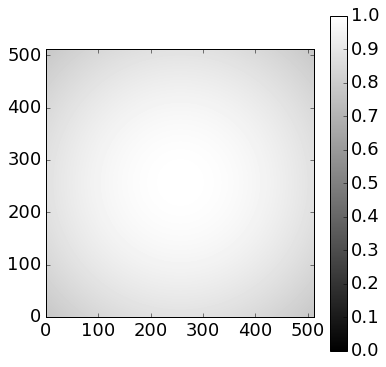

Current step                    : 0
Error (of focused Fourier plane): 9.80e-03
Current step                    : 100
Error (of focused Fourier plane): 3.19e-03
Current filter:


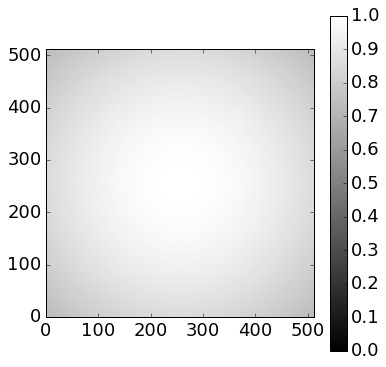

Current step                    : 200
Error (of focused Fourier plane): 3.17e-03
Current step                    : 300
Error (of focused Fourier plane): 3.31e-03
Current filter:


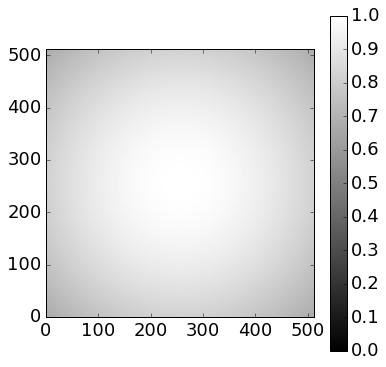

Current step                    : 400
Error (of focused Fourier plane): 3.16e-03
Current step                    : 500
Error (of focused Fourier plane): 3.37e-03
Current filter:


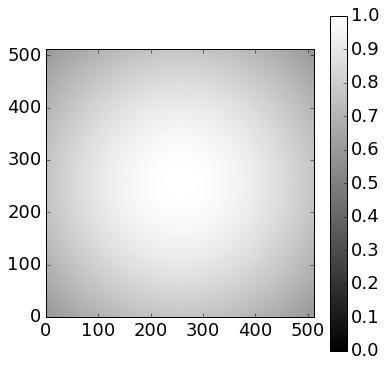

Current step                    : 600
Error (of focused Fourier plane): 3.16e-03
Current step                    : 700
Error (of focused Fourier plane): 3.35e-03
Current filter:


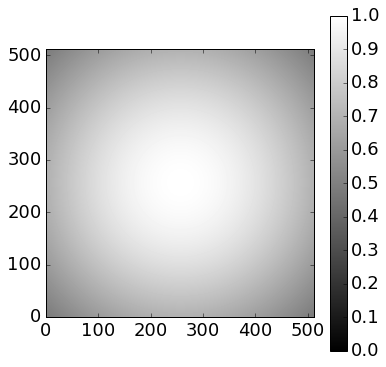

Current step                    : 800
Error (of focused Fourier plane): 3.17e-03
Current step                    : 900
Error (of focused Fourier plane): 3.39e-03
Current filter:


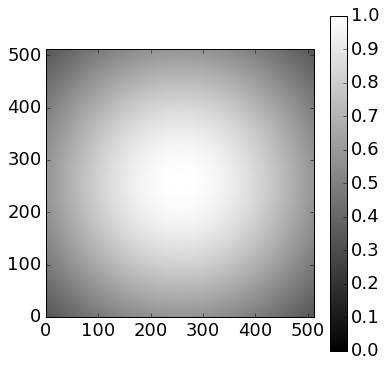

Current step                    : 1000
Error (of focused Fourier plane): 3.17e-03
Current step                    : 1100
Error (of focused Fourier plane): 3.35e-03
Current filter:


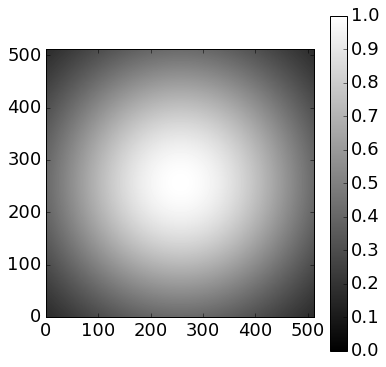

Current step                    : 1200
Error (of focused Fourier plane): 3.17e-03
Current step                    : 1300
Error (of focused Fourier plane): 3.35e-03
Current filter:


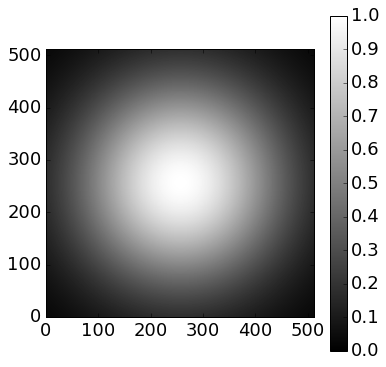

Current step                    : 1400
Error (of focused Fourier plane): 3.17e-03
Current step                    : 1500
Error (of focused Fourier plane): 3.32e-03
Current filter:


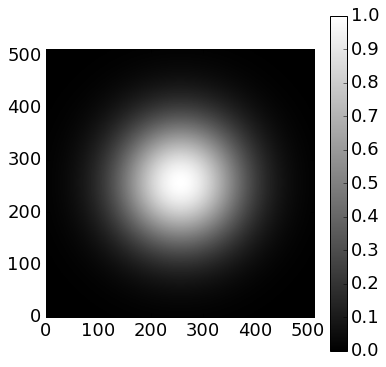

Current step                    : 1600
Error (of focused Fourier plane): 3.16e-03
Current step                    : 1700
Error (of focused Fourier plane): 3.21e-03
Current filter:


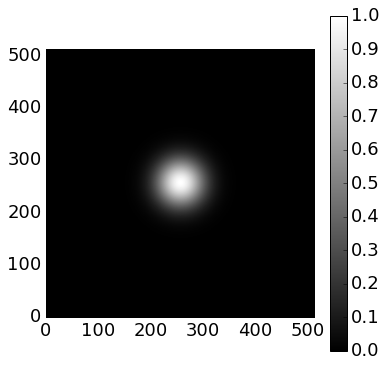

Current step                    : 1800
Error (of focused Fourier plane): 3.10e-03
Current step                    : 1900
Error (of focused Fourier plane): 3.11e-03
-----------------------
First iteration error: 9.80e-03
Final step : 2000
Final Error: 3.02e-03


In [65]:
PD_ER_pup10, \
PD_ER_foc10, \
PD_ER_errlist10, \
PD_ER_pup10_proj,\
PD_ER_errpuplist10 = test10.PD_ER_smoothing(defocus=defocus,
                                            force_only_phase=True,smoo_in=True)

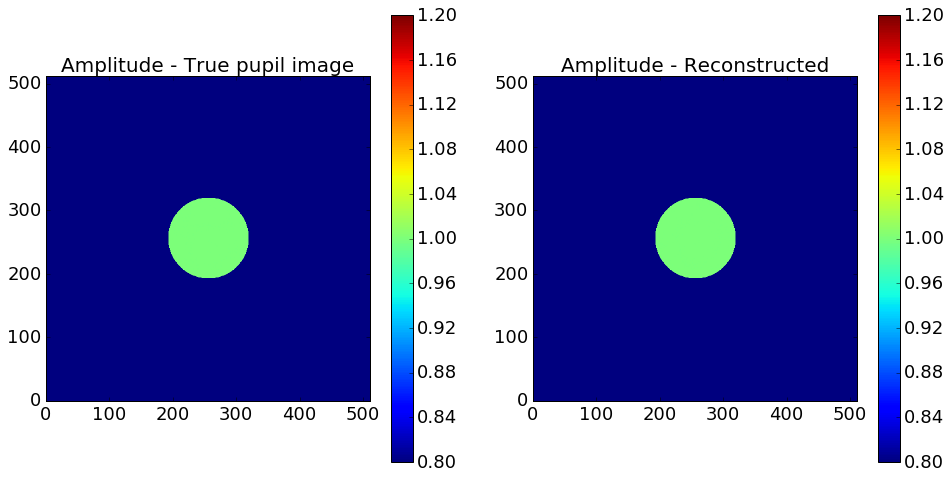

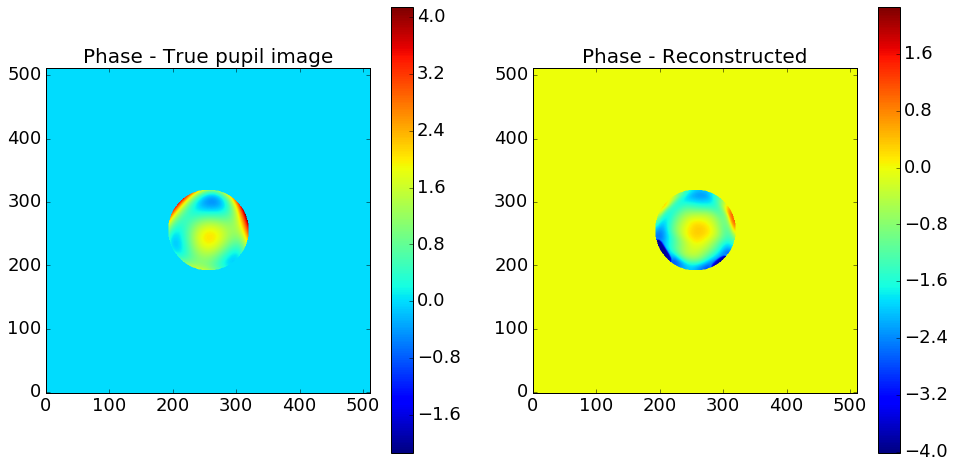

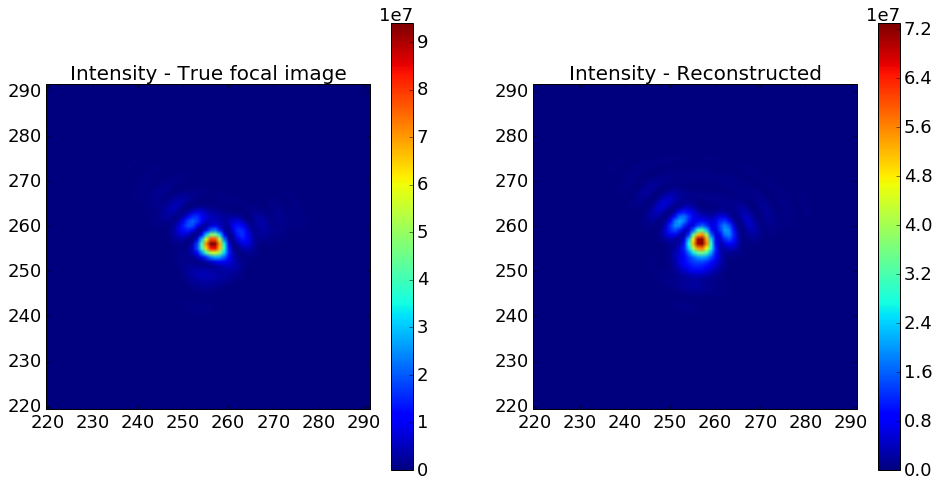

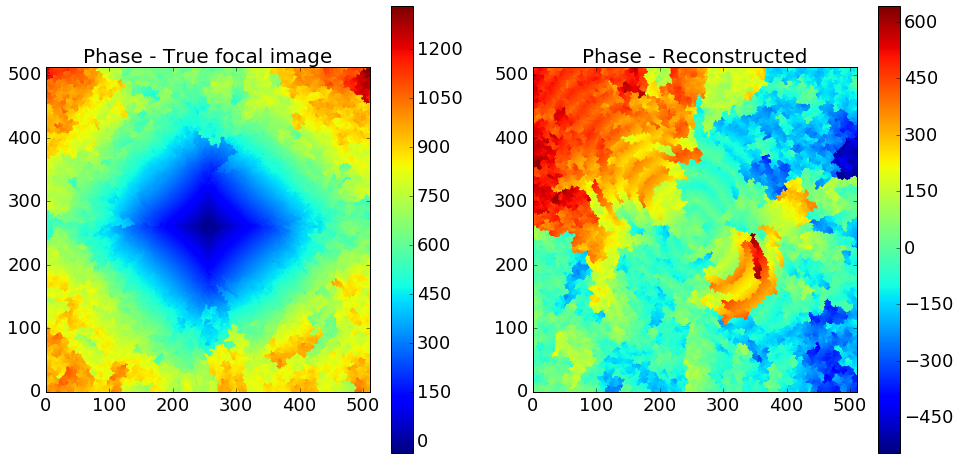

In [66]:
plot_recon(P_10,F_10,PD_ER_pup10_proj,PD_ER_foc10,recons_clim=True,max_abrPha=.5)

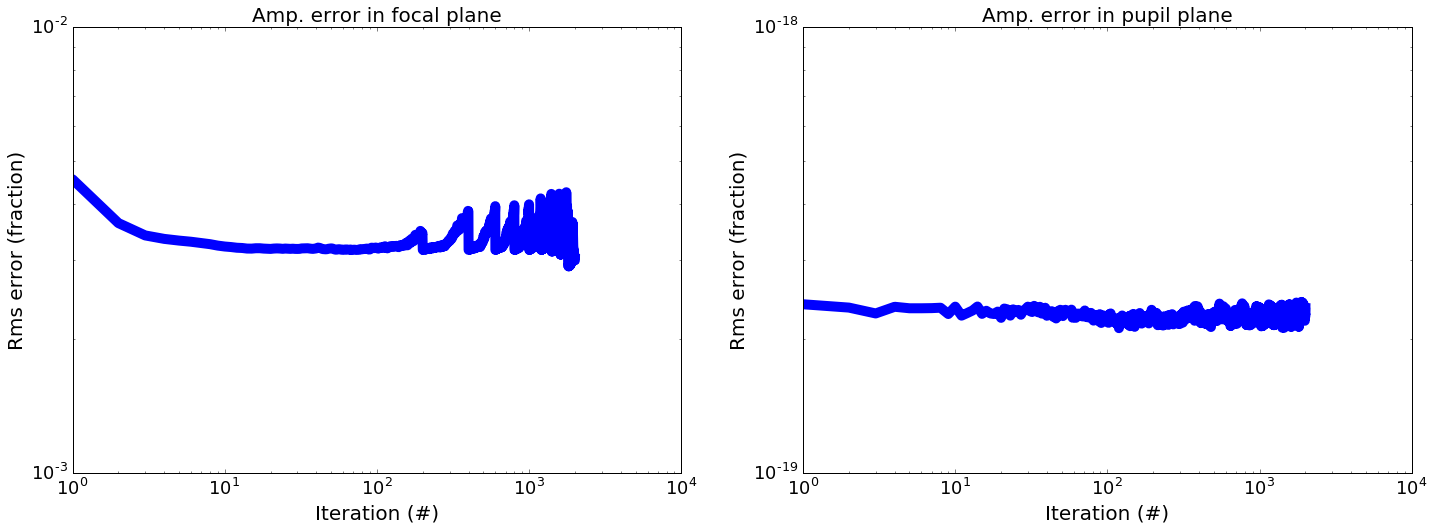

In [67]:
plot_errlist(PD_ER_errlist10,PD_ER_errpuplist10)

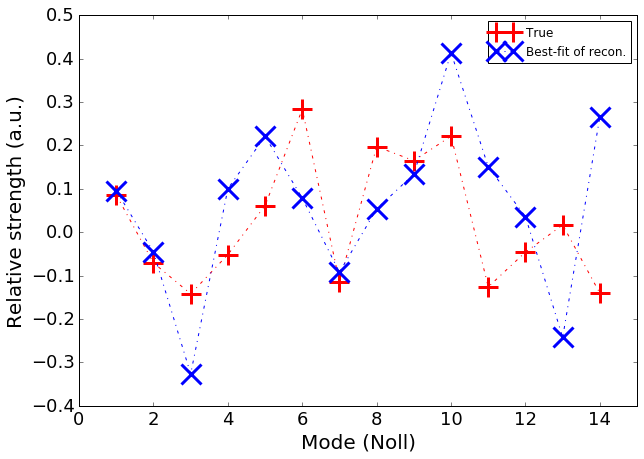

In [84]:
coef_10_true, \
coef_10_reco = wrap_up_zern_fit(test10,
                                Recon_phasor=PD_ER_pup10_proj,
                                P_phasor=P_10,
                                oversamp=2)

OK, it seems reasonable this time, but still worse than OSS. Would suspect the cause to be insufficient "defocusing"

---
## One-tenth of a wave
> Note: Experience told us that atmospheric WFE is another factor of 3 smaller than this

### Pattern 1

In [4]:
coeff1 = [0]*35
coeff2 = [0,0,0.4,1,0,0,3,0,0.9,1,0,1.5,0,0.4,0]+list(0.5*np.random.random(20)-1)
defocus = 0.1

[P11s,P_11s,F11s,F_11s], \
[D11s,D_11s,Fd11s,F_d11s] = true_imgs_defocus(Npix=128,oversamp=2,
                                              coeff1=coeff1,
                                              coeff2=coeff2,
                                              defocus=defocus,
                                              max_aberP=0.05)

test11s = PR(pup=P11s,foc=F11s,oversamp=2)
test11s(foc_defoc=[F11s,Fd11s])

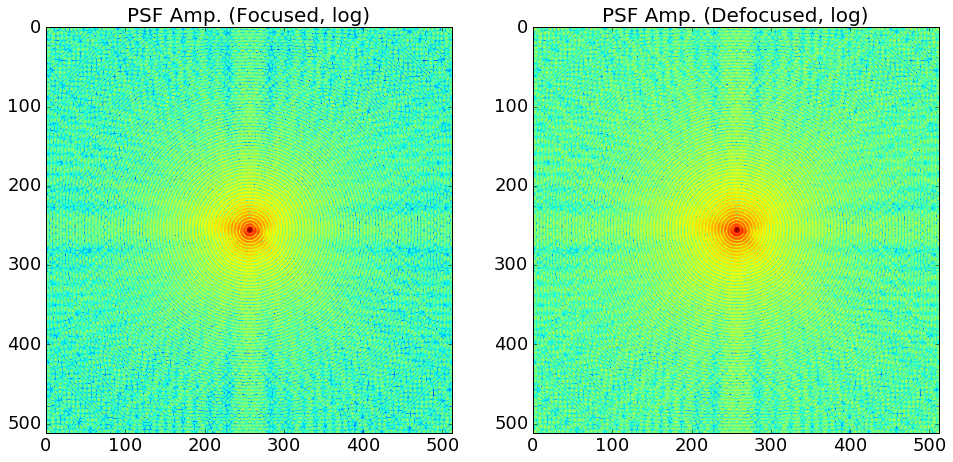

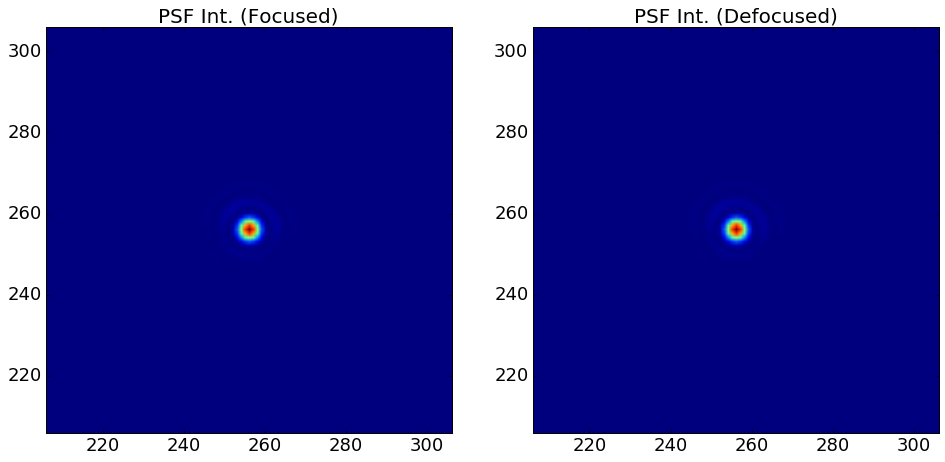

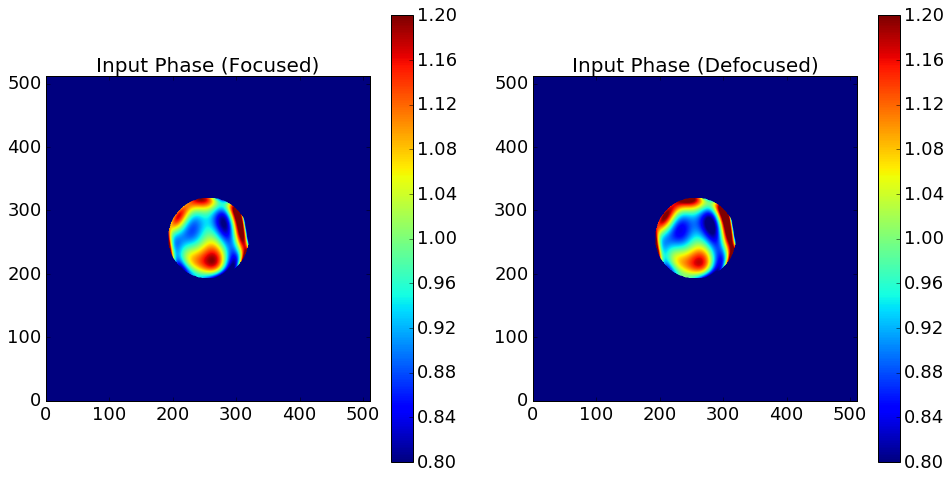

In [7]:
plt.figure(figsize=(16,8))
plt.subplot(121); plt.imshow(np.sqrt(test11s.foc_foc),norm=LogNorm()); plt.title('PSF Amp. (Focused, log)')
plt.subplot(122); plt.imshow(np.sqrt(test11s.foc_def),norm=LogNorm()); plt.title('PSF Amp. (Defocused, log)')

plt.figure(figsize=(16,8))
plt.subplot(121); plt.imshow(test11s.foc_foc); plt.title('PSF Int. (Focused)'); plt.xlim(206,306); plt.ylim(206,306)
plt.subplot(122); plt.imshow(test11s.foc_def); plt.title('PSF Int. (Defocused)'); plt.xlim(206,306); plt.ylim(206,306)

plt.figure(figsize=(16,8))
plt.subplot(121); plt.imshow(unwrap_phase(np.angle(P_11s)),origin='lower'); 
plt.colorbar(); plt.title('Input Phase (Focused)'); plt.clim(0.8,1.2)
plt.subplot(122); plt.imshow(unwrap_phase(np.angle(D_11s)),origin='lower'); 
plt.colorbar(); plt.title('Input Phase (Defocused)'); plt.clim(0.8,1.2)

Caution: Pupil image is not used for constraints.
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Gradual filtering done in the whole plane


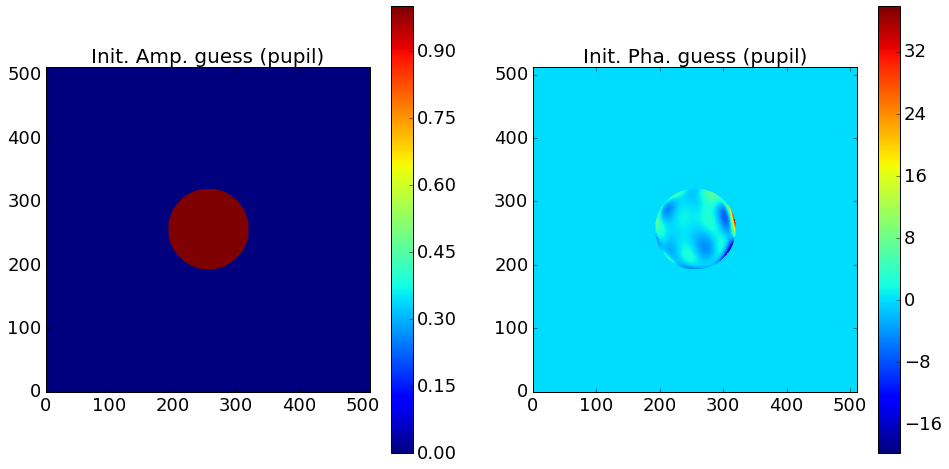

Current filter:


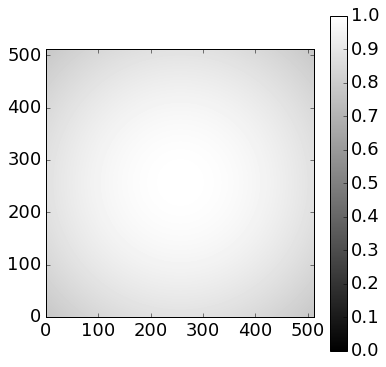

Current step                    : 0
Error (of focused Fourier plane): 1.33e-02
Current step                    : 100
Error (of focused Fourier plane): 9.70e-03
Current filter:


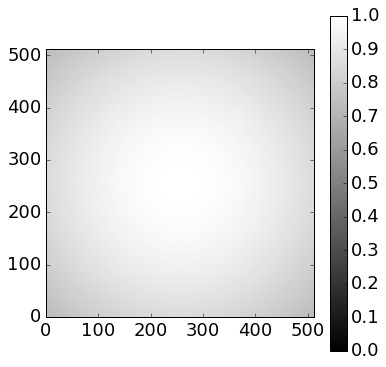

Current step                    : 200
Error (of focused Fourier plane): 7.84e-03
Current step                    : 300
Error (of focused Fourier plane): 9.67e-03
Current filter:


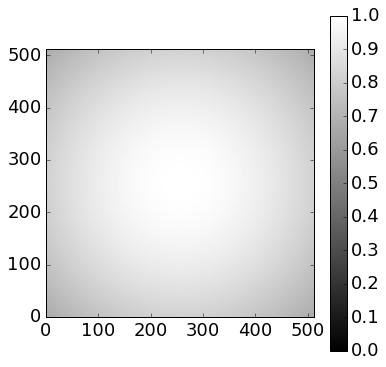

Current step                    : 400
Error (of focused Fourier plane): 8.77e-03
Current step                    : 500
Error (of focused Fourier plane): 9.69e-03
Current filter:


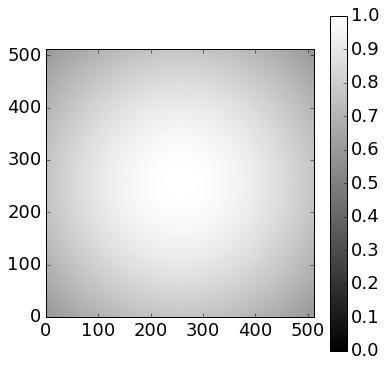

Current step                    : 600
Error (of focused Fourier plane): 9.20e-03
Current step                    : 700
Error (of focused Fourier plane): 9.70e-03
Current filter:


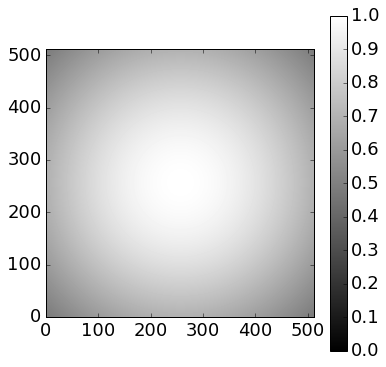

Current step                    : 800
Error (of focused Fourier plane): 9.37e-03
Current step                    : 900
Error (of focused Fourier plane): 9.67e-03
Current filter:


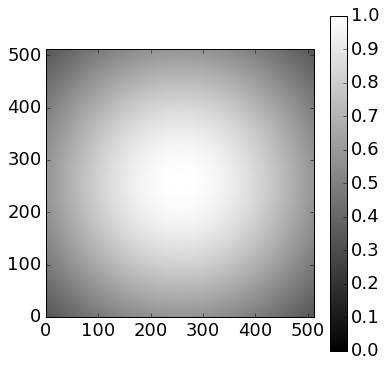

Current step                    : 1000
Error (of focused Fourier plane): 9.46e-03
Current step                    : 1100
Error (of focused Fourier plane): 9.66e-03
Current filter:


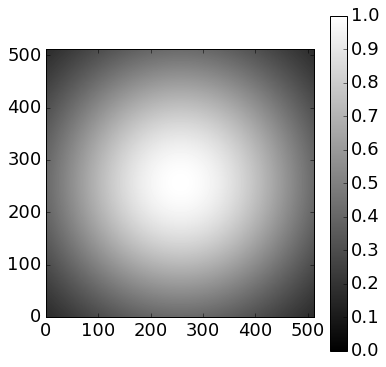

Current step                    : 1200
Error (of focused Fourier plane): 9.59e-03
Current step                    : 1300
Error (of focused Fourier plane): 9.68e-03
Current filter:


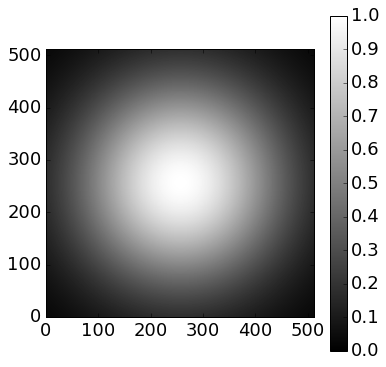

Current step                    : 1400
Error (of focused Fourier plane): 9.58e-03
Current step                    : 1500
Error (of focused Fourier plane): 9.66e-03
Current filter:


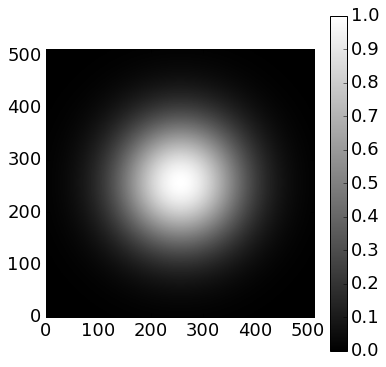

Current step                    : 1600
Error (of focused Fourier plane): 9.63e-03
Current step                    : 1700
Error (of focused Fourier plane): 9.63e-03
Current filter:


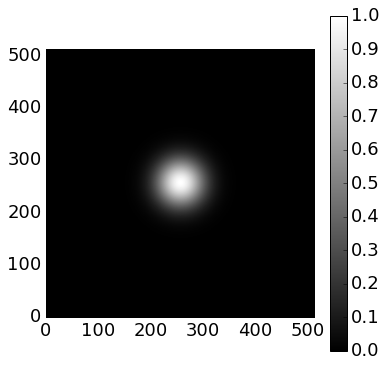

Current step                    : 1800
Error (of focused Fourier plane): 9.62e-03
Current step                    : 1900
Error (of focused Fourier plane): 9.32e-03
-----------------------
First iteration error: 1.33e-02
Final step : 2000
Final Error: 9.32e-03


In [8]:
PD_ER_pup11s, \
PD_ER_foc11s, \
PD_ER_errlist11s, \
PD_ER_pup11s_proj,\
PD_ER_errpuplist11s = test11s.PD_ER_smoothing(defocus=defocus,init='random',
                                              force_only_phase=True,smoo_in=True)

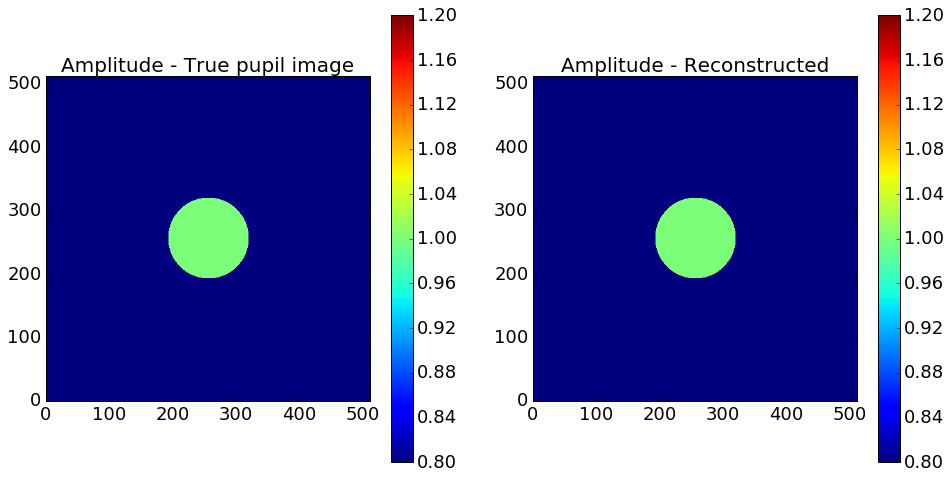

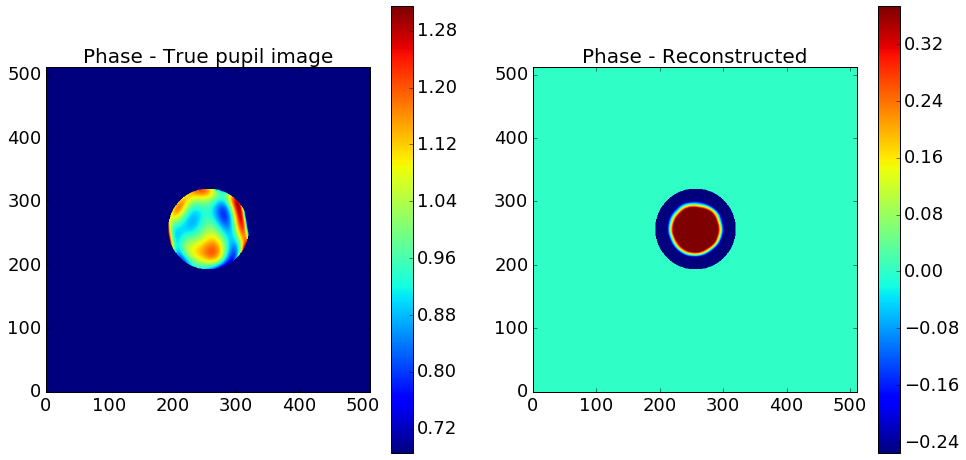

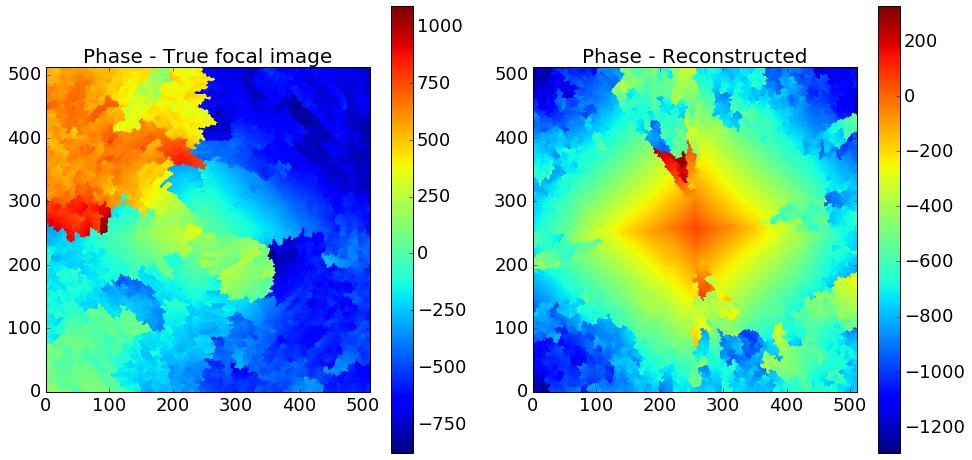

In [9]:
plot_recon(P_11s,F_11s,PD_ER_pup11s_proj,PD_ER_foc11s,recons_clim=True,max_abrPha=0.05)

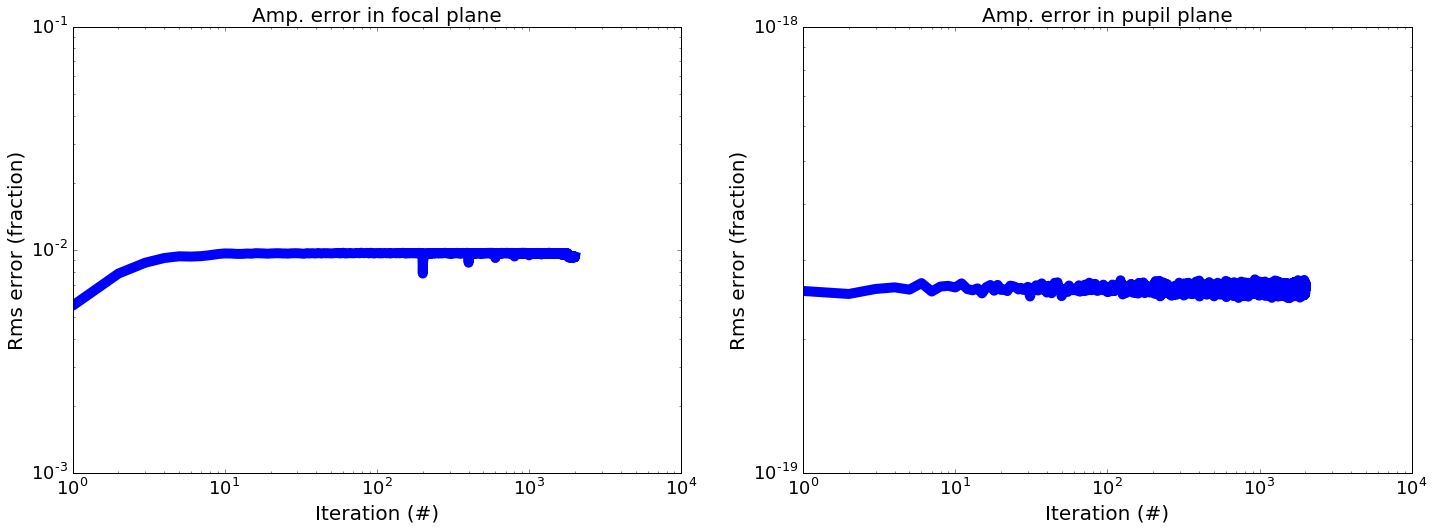

In [10]:
plot_errlist(PD_ER_errlist11s,PD_ER_errpuplist11s)

### Pattern 2

In [11]:
coeff1 = [0]*35
coeff2 = [0,1,0,0,0,1,2,0,2,1.5,2,0,0,0,0]+list(0.5*np.random.random(20)-1)
defocus = 0.1

[P10s,P_10s,F10s,F_10s], \
[D10s,D_10s,Fd10s,F_d10s] = true_imgs_defocus(Npix=128,oversamp=2,
                                          coeff1=coeff1,
                                          coeff2=coeff2,
                                          defocus=defocus,
                                          max_aberP=.05)

test10s = PR(pup=P10s,foc=F10s,oversamp=2)
test10s(foc_defoc=[F10s,Fd10s])

Caution: Pupil image is not used for constraints.
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Gradual filtering done in the whole plane


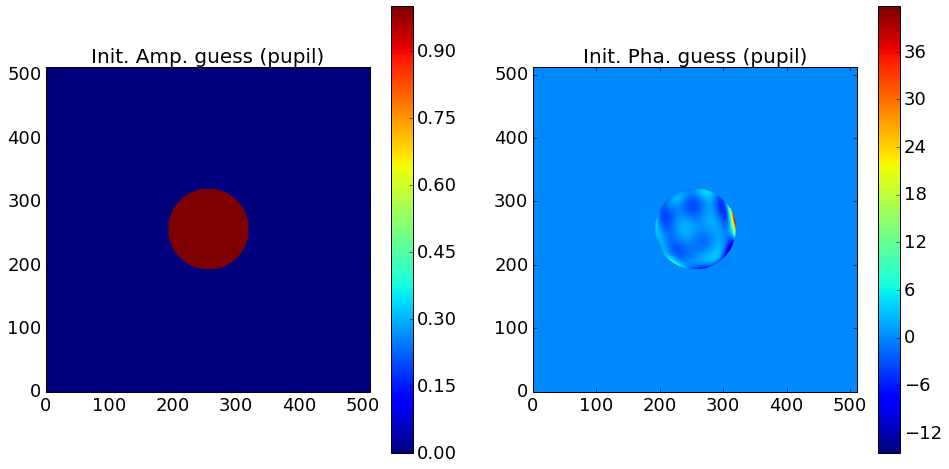

Current filter:


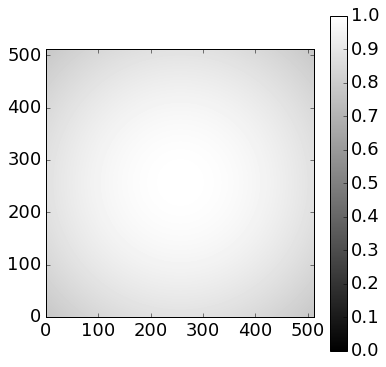

Current step                    : 0
Error (of focused Fourier plane): 1.36e-02
Current step                    : 100
Error (of focused Fourier plane): 9.72e-03
Current filter:


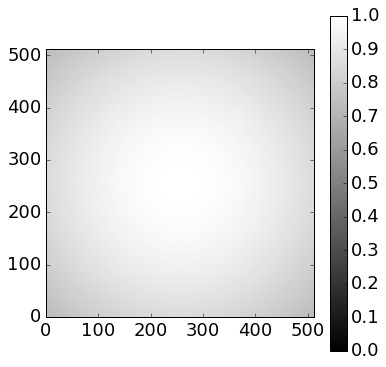

Current step                    : 200
Error (of focused Fourier plane): 7.66e-03
Current step                    : 300
Error (of focused Fourier plane): 9.68e-03
Current filter:


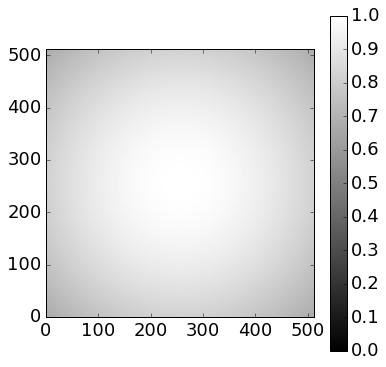

Current step                    : 400
Error (of focused Fourier plane): 8.62e-03
Current step                    : 500
Error (of focused Fourier plane): 9.68e-03
Current filter:


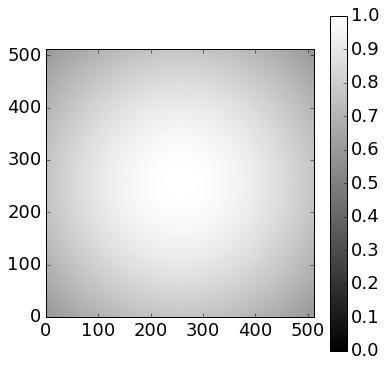

Current step                    : 600
Error (of focused Fourier plane): 9.09e-03
Current step                    : 700
Error (of focused Fourier plane): 9.71e-03
Current filter:


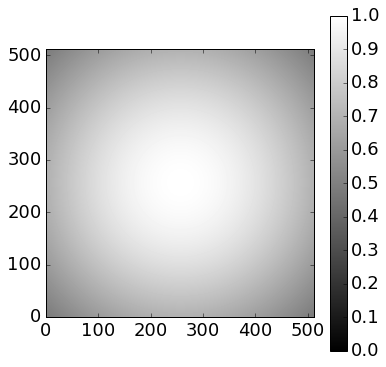

Current step                    : 800
Error (of focused Fourier plane): 9.25e-03
Current step                    : 900
Error (of focused Fourier plane): 9.67e-03
Current filter:


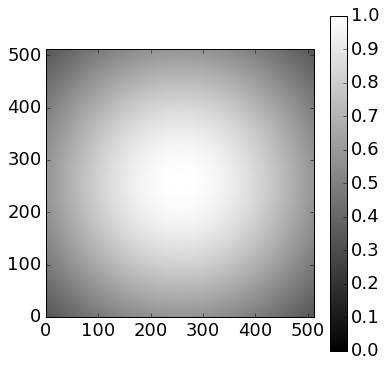

Current step                    : 1000
Error (of focused Fourier plane): 9.34e-03
Current step                    : 1100
Error (of focused Fourier plane): 9.70e-03
Current filter:


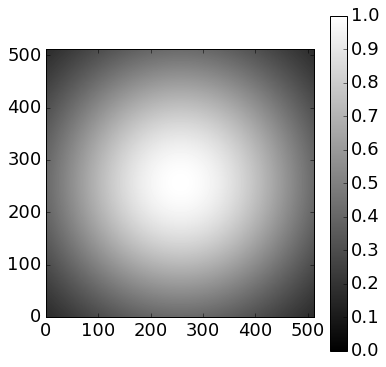

Current step                    : 1200
Error (of focused Fourier plane): 9.40e-03
Current step                    : 1300
Error (of focused Fourier plane): 9.72e-03
Current filter:


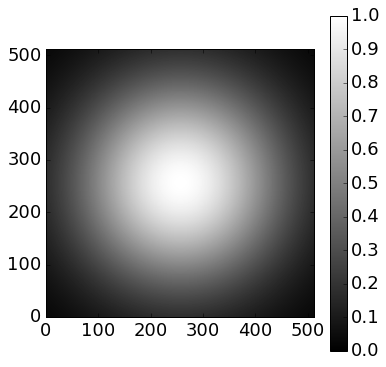

Current step                    : 1400
Error (of focused Fourier plane): 9.54e-03
Current step                    : 1500
Error (of focused Fourier plane): 9.67e-03
Current filter:


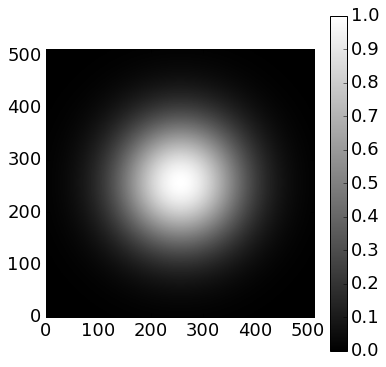

Current step                    : 1600
Error (of focused Fourier plane): 9.52e-03
Current step                    : 1700
Error (of focused Fourier plane): 9.67e-03
Current filter:


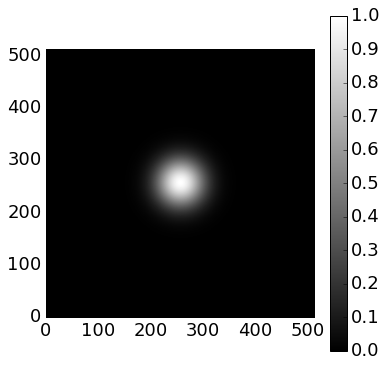

Current step                    : 1800
Error (of focused Fourier plane): 9.65e-03
Current step                    : 1900
Error (of focused Fourier plane): 9.33e-03
-----------------------
First iteration error: 1.36e-02
Final step : 2000
Final Error: 9.33e-03


In [12]:
PD_ER_pup10s, \
PD_ER_foc10s, \
PD_ER_errlist10s, \
PD_ER_pup10s_proj,\
PD_ER_errpuplist10s = test10s.PD_ER_smoothing(defocus=defocus,init='random',
                                              force_only_phase=True,smoo_in=True)

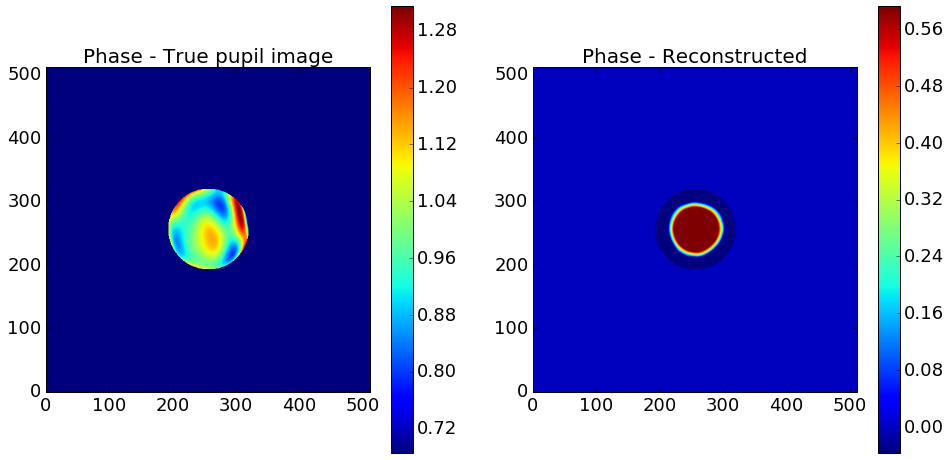

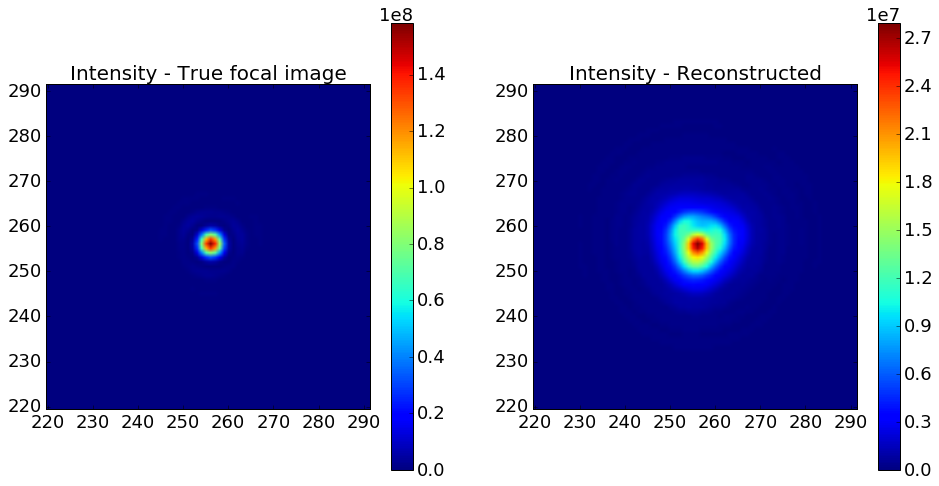

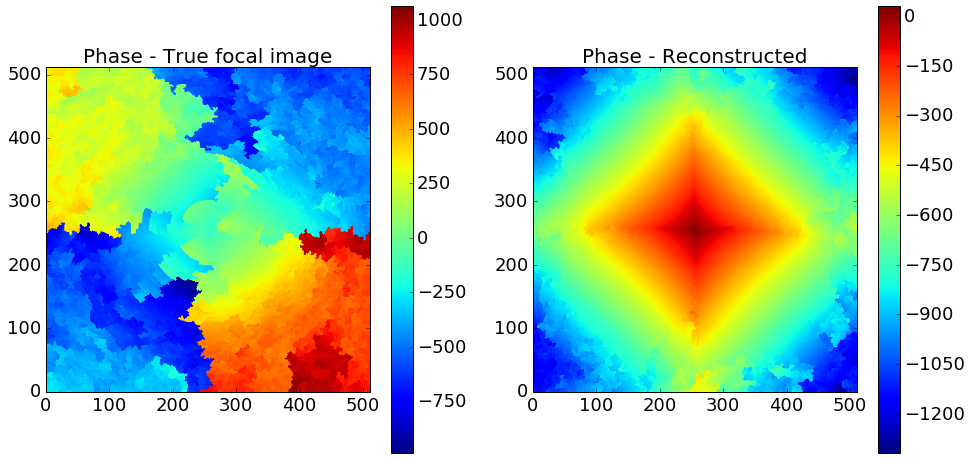

In [13]:
plot_recon(P_10s,F_10s,PD_ER_pup10s_proj,PD_ER_foc10s,recons_clim=True,max_abrPha=0.05)

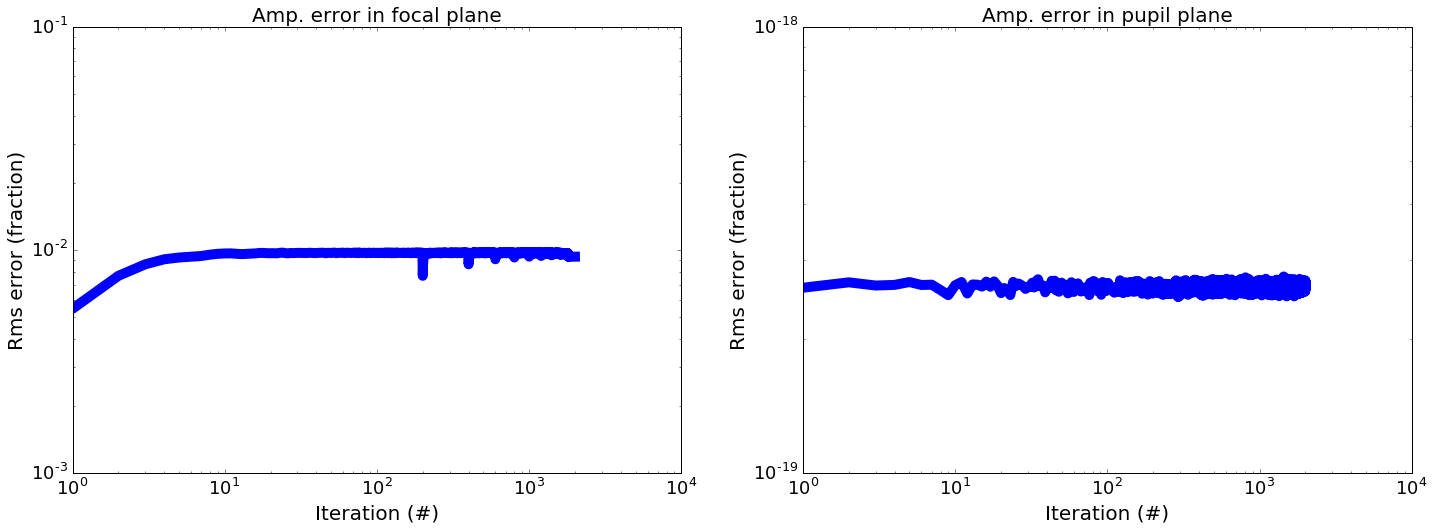

In [14]:
plot_errlist(PD_ER_errlist10s,PD_ER_errpuplist10s)

---
# Conclusions
- _Recall that the defocusing is now 1/10 of a wave_
- For small aberrations (1/10 of full wave), PD never worked
- For larger aberrations, PD is doing farily well. Albeit not having the same power as OSS, it resolves the degeneracy problem (flipping and reversed sign)

---
## Sanity check
True phases even though we assume the same "uniform" amplitude in pupil plane

_100% aberration_

Caution: Pupil image is not used for constraints.
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Gradual filtering done in the whole plane


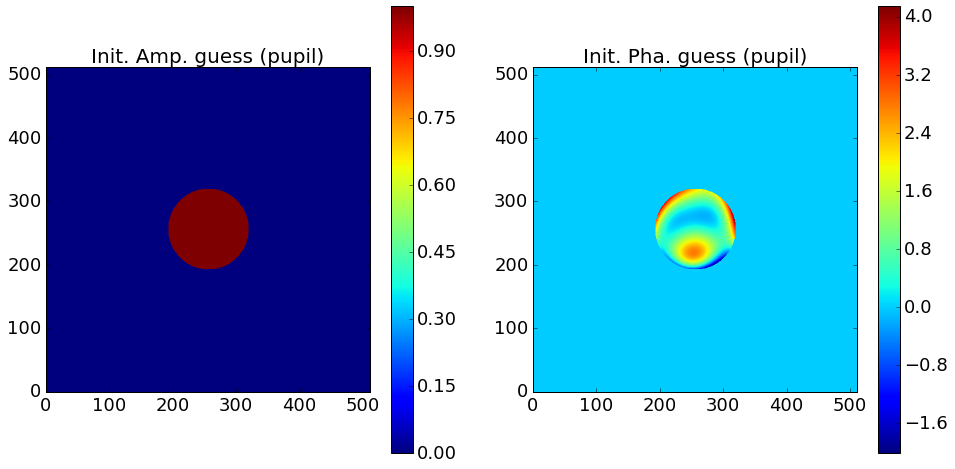

Current filter:


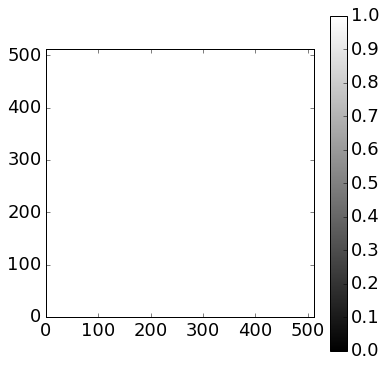

Current step                    : 0
Error (of focused Fourier plane): 2.33e-13
-----------------------
First iteration error: 2.33e-13
Final step : 1
Final Error: 2.33e-13


In [121]:
PD_ER_pup1t, \
PD_ER_foc1t, \
PD_ER_errlist1t, \
PD_ER_pup1t_proj,\
PD_ER_errpuplist1t = test11.PD_ER_smoothing(defocus=defocus,init='test',
                                            alpha_par=[1e10,1e10,1],
                                            true_phasorPf=P_11,true_phasorPd=D_11,
                                            force_only_phase=True,smoo_in=True,
                                            iterlim=1)

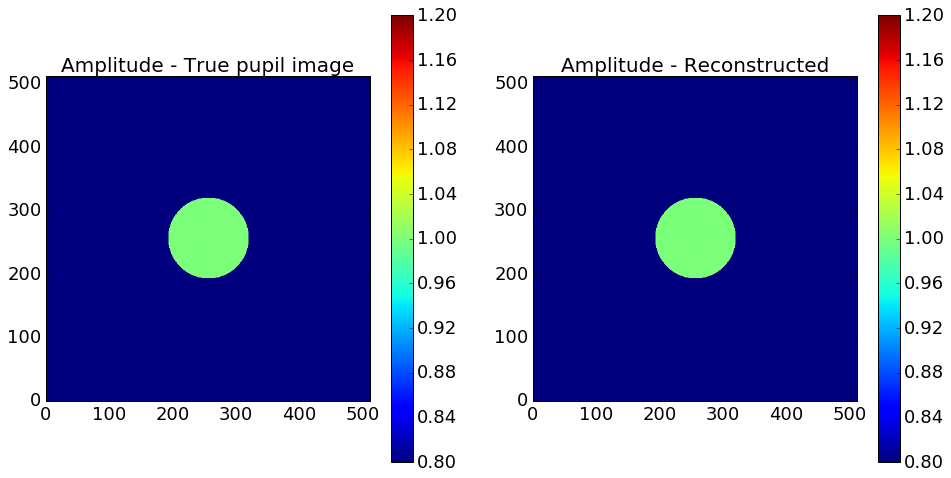

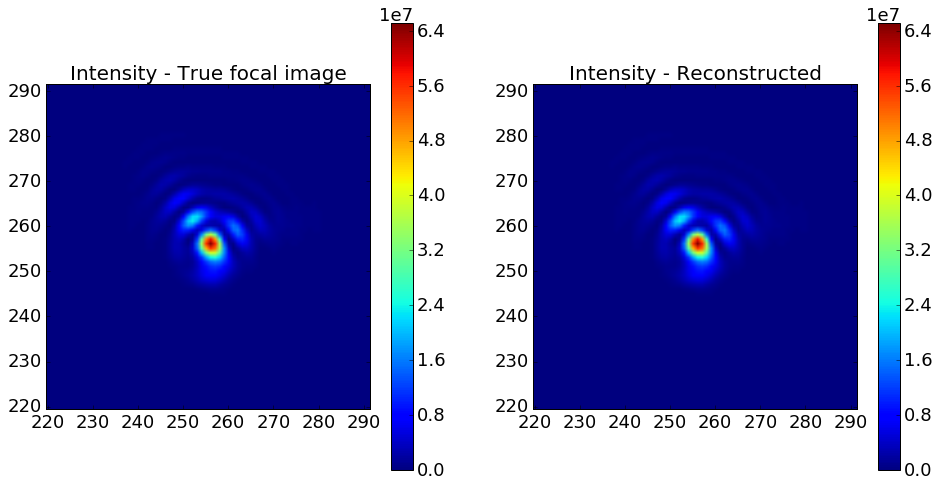

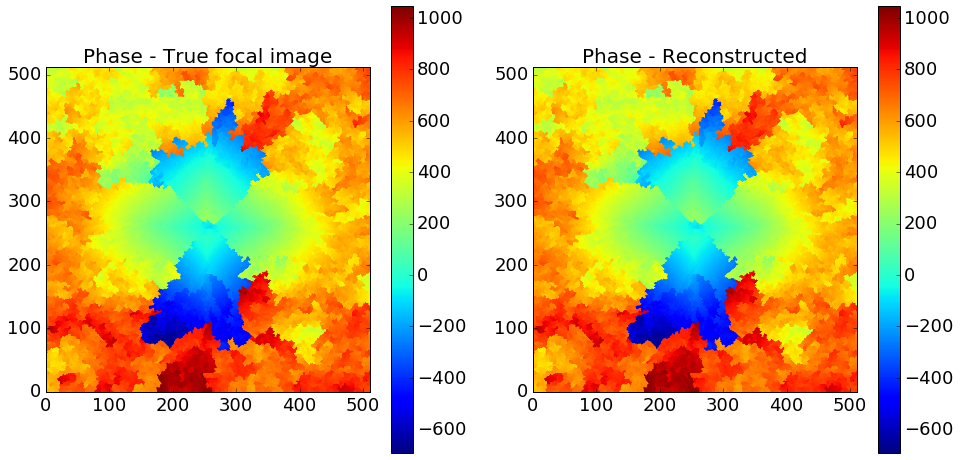

In [122]:
plot_recon(P_11,F_11,PD_ER_pup1t_proj,PD_ER_foc1t,recons_clim=True,max_abrPha=0.5)

Just for fun...

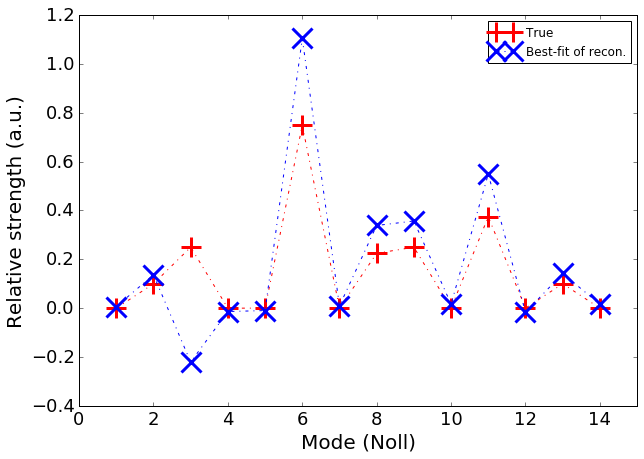

In [123]:
coef_1t_true, \
coef_1t_reco = wrap_up_zern_fit(test11,
                                Recon_phasor=PD_ER_pup1t_proj,
                                P_phasor=P_11,
                                oversamp=2)

Makes sense though (that the reconstruction under even 1 iteration was not perfect) because our initial amplitude guess is always "uniform" regardless of the defocusing, which should have introduced some variation in amplitude for the defocused pupil image